In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [29]:
N = 10000
toShow = [10, 25, 50, 100, 1000, N]

def showGraphs():
    distr = sts.norm(0, 1)
    sample = distr.rvs(N)
    Dn = np.zeros(N)
    grid = np.linspace(-3, 3, 100)
    for n in range(1, N):
        Fn = ECDF(sample[:n])
        Dn[n] = abs(Fn.y - distr.cdf(Fn.x)).max()
        if (n in toShow):
            plt.figure(figsize=(9, 5))
            plt.step(Fn.x, Fn.y, label='$F_{' + str(n) + '}$')
            plt.scatter(sample[:n], np.zeros(n) + 0.02,\
                        alpha=0.2, s=40, label='Sample')
            plt.plot(grid, distr.cdf(grid), label='$\\mathscr{N}(0, 1)$')
            plt.legend()
            plt.xlim((-3, 3))
            plt.ylim((0, 1))
            plt.title('n=' + str(n))
            plt.show()
    plt.figure(figsize=(9, 5))
    plt.plot(range(1, N + 1), Dn, label='$D_{n}$')
    plt.legend()
    plt.ylim((0, 0.3))
    plt.xlabel('n')
    plt.ylabel('$D_{n}(n)$')
    plt.title('$D_{n} = \\sup_{x \\in \\mathbb{R}}|F_{n}(x) - F(x)|$')
    plt.show()

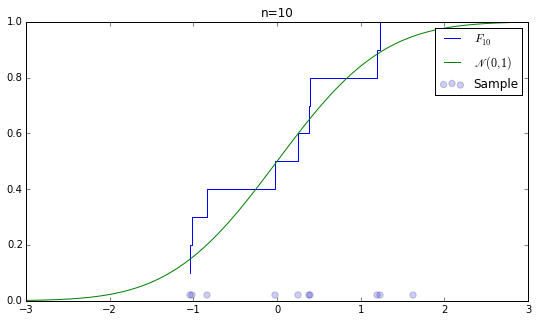

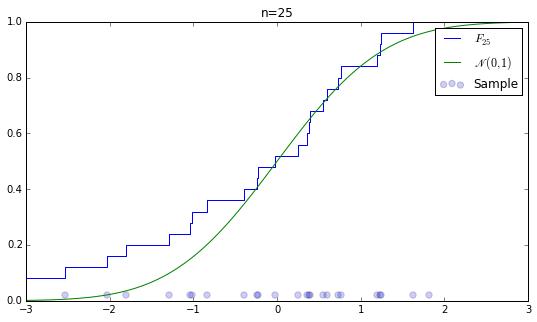

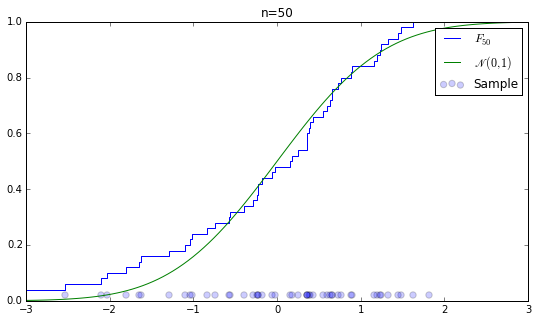

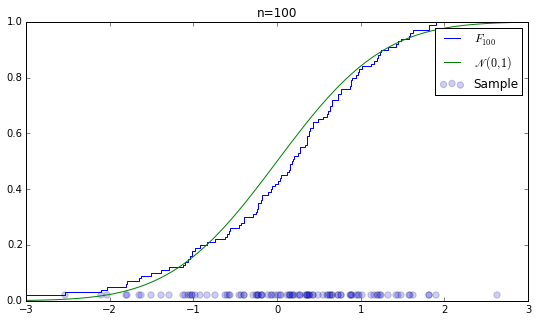

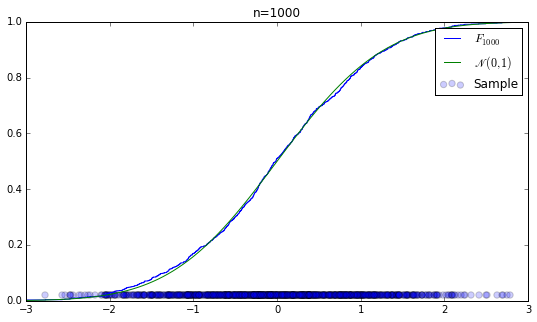

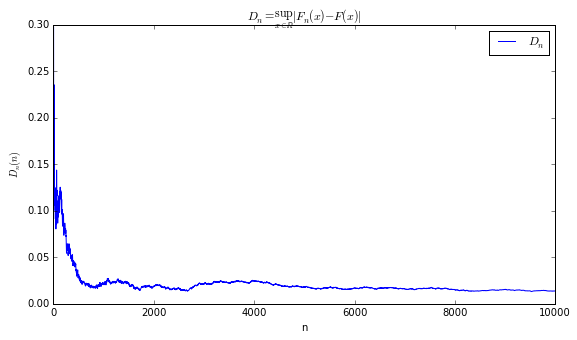

In [30]:
showGraphs()